## Assignment 2
    1. Name: Digambar Chaure
    2. Batch: P-10
    3. Roll No.: 43216
    
   ### Problem Statement :
    Implementing Feedforward neural networks with Keras and TensorFlow

#### a. Import necessary packages

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

#### b. Load the training and testing data (MNIST/CIFAR10)
Grabbing the mnist dataset

In [2]:
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [3]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

#### c. Define the network architecture using Keras
Building the model

In [4]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

#### d. Train the model using SGD

In [5]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 2.2905 - accuracy: 0.1649 - val_loss: 2.2516 - val_accuracy: 0.3120
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 2.2246 - accuracy: 0.3373 - val_loss: 2.1926 - val_accuracy: 0.5215
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 2.1572 - accuracy: 0.4799 - val_loss: 2.1126 - val_accuracy: 0.5367
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 2.0636 - accuracy: 0.5439 - val_loss: 2.0013 - val_accuracy: 0.5999
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 1.9347 - accuracy: 0.6005 - val_loss: 1.8517 - val_accuracy: 0.6292
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 1.7715 - accuracy: 0.6396 - val_loss: 1.6724 - val_accuracy: 0.6858
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 1.5881 - accuracy: 0.6834 - val_loss: 1.4830 - val_accuracy: 0.7179
Epoch 

#### e. Evaluate the network
Making the predictions

In [6]:
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       980
           1       0.78      0.98      0.87      1135
           2       0.83      0.72      0.78      1032
           3       0.70      0.88      0.78      1010
           4       0.75      0.81      0.78       982
           5       0.87      0.33      0.47       892
           6       0.84      0.88      0.86       958
           7       0.80      0.89      0.84      1028
           8       0.80      0.66      0.72       974
           9       0.76      0.66      0.71      1009

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.77     10000
weighted avg       0.79      0.78      0.77     10000



#### f. Plot the training loss and accuracy

[]

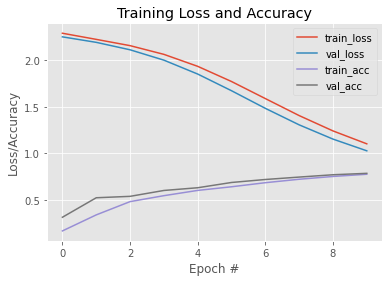

In [7]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.plot()